In [1]:
import numpy as np
#list important:
# k_create,
# one_hot_sim, k_exp_horiz

#Set Parameters
n = 7
k_o = 0.4
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 2
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

K = {}
K_exp = {}
A = {}

arr_len = n-1
dual_len = (n-1) * 2
dual_len_exp = (n-1)*2 + 2
a = np.zeros(dual_len)
a_exp = np.zeros(dual_len_exp)
b = np.zeros(arr_len)
b_bar = np.zeros(arr_len)
c = np.zeros(1)
c_bar = np.zeros(1) 

In [3]:
#i <= j-1
#tested
def D_ij_analytical_case_1a(i, j):
    l = lamb_val
    one = np.sinh((n-j)*l)
    two = np.sinh(i*l)
    three = np.sinh((i-1)*l)
    four = np.sinh((n-(j-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_1b(i, j):
    num = 2 * np.cosh( (i-1/2) * lamb_val ) * np.cosh( (n-(j-1/2)) * lamb_val) * np.tanh(lamb_val/2) 
    denom = np.sinh(lamb_val * n)
    return num/denom

#tested
def D_ij_analytical_case_2a(i, j):
    l = lamb_val
    one = np.sinh((n-i)*l)
    two = np.sinh(j*l)
    three = np.sinh((j-1)*l)
    four = np.sinh((n-(i-1))*l)
    num = (one * three) + (four * two) - (one * two) - (four * three)
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_2b(i, j):
    num = 2 * np.cosh( (j-1/2) * lamb_val ) * np.cosh( (n-(i-1/2)) * lamb_val) * np.tanh(lamb_val/2) 
    denom = np.sinh(lamb_val * n)
    return num/denom

def create_D_ij_analytical_1_case_3a(i, j):
    l = lamb_val
    one = np.sinh((n - max(i-1,j))*l) * np.sinh(min(i-1,j)*l)
    two = np.sinh((n - max(i,j-1))*l) * np.sinh(min(i,j-1)*l)
    three = np.sinh(((n-max(i,j)))*l) * np.sinh((min(i,j))*l)
    four = np.sinh((n-max(i-1,j-1))*l) * np.sinh(min(i-1,j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_3b(i, j):
    l = lamb_val
    one = np.sinh((n-j)*l) * np.sinh((i-1)*l)
    two = np.sinh((n-i)*l) * np.sinh((j-1)*l)
    three = np.sinh((n-i)*l) * np.sinh((i)*l)
    four = np.sinh((n-(i-1))*l) * np.sinh((j-1)*l)
    num = one + two - three - four
    denom = np.sinh(lamb_val) * np.sinh(lamb_val * n)
    return num/denom

def D_ij_analytical_case_3c(i, j):
    lamb = lamb_val
    return -1 + ( ( 2 * np.tanh(lamb/2) * np.cosh((i-1/2)*lamb) * np.cosh((n-i+1/2)*lamb) ) / np.sinh(lamb*n) )


def D_ij_analytical_sol(i, j):
        if i < j:
            return D_ij_analytical_case_1b(i, j)
        elif i > j: 
            return D_ij_analytical_case_2b(i, j)
        elif i == j:
            return D_ij_analytical_case_3c(i, j)

[ 0.21790881  0.21790881 -0.67313679  0.09924922 -0.07874016  0.70390038
 -0.16150888]


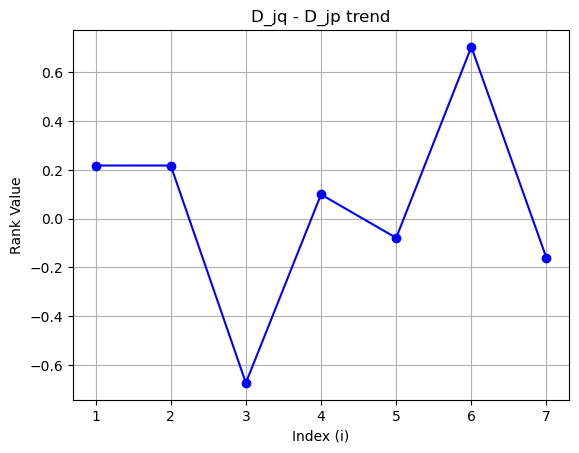

In [4]:
import matplotlib.pyplot as plt

D_ij_array2 = np.zeros(n)
for j in range(0,n):
    D_ij_array2[j] = D_ij_analytical_sol(j,q) - D_ij_analytical_sol(j,p)
print(D_ij_array2)

index = list(range(1,n+1))
plt.plot(index, D_ij_array2, marker='o', linestyle='-', color='b')
plt.title('D_jq - D_jp trend')
plt.xlabel('Index (i)')
plt.ylabel('Rank Value')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()